# Handling missing values using Sklearn (Arbitary value imputation)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
df = pd.read_csv('titanic_toy.csv')

In [15]:
X = df.drop('Survived', axis =1)
y = df['Survived']

In [16]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [23]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [24]:
X_train.head()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750,31.2750


In [25]:
print('Original age variable variance: ',X_train['Age'].var())
print('Age variance after imputing 99: ',X_train['Age_99'].var())
print('Age variance after imputing -1: ', X_train['Age_minus1'].var())

print('Original fare variable variance: ',X_train['Fare'].var())
print('Fare variance after imputing 999: ',X_train['Fare_999'].var())
print('Fare varianvce after imputing -1: ',X_train['Fare_minus1'].var())

Original age variable variance:  210.2517072477438
Age variance after imputing 99:  932.9665366701436
Age variance after imputing -1:  315.99550362600644
Original fare variable variance:  2761.031434948639
Fare variance after imputing 999:  47525.47059536007
Fare varianvce after imputing -1:  2675.2394049177087


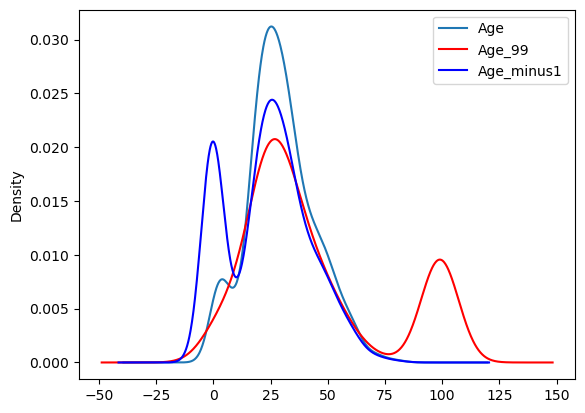

In [26]:
# visualization on age column

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
X_train['Age_minus1'].plot(kind='kde',ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

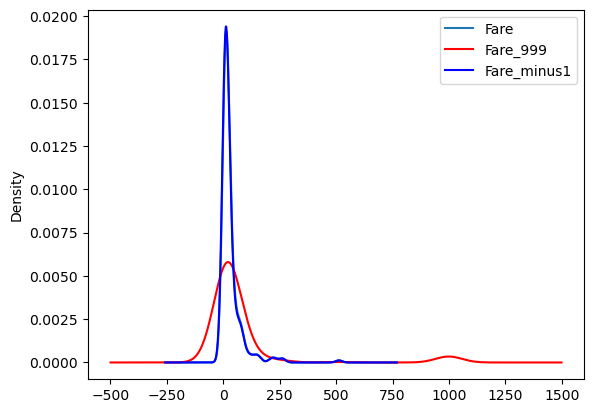

In [27]:
# visualization on fare column

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_minus1'].plot(kind='kde',ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [28]:
X_train.cov()


,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162,130.495777
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447,16.878492
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070,-255.051165
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305,262.712284
Fare_99,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817,47525.470595
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405,1063.944817
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817,47525.470595


In [30]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422,0.039967
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212,0.046016
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017,-0.038303
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159,0.067792
Fare_99,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357,1.000000
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000,0.094357
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357,1.000000


### Using Sklearn

In [31]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
imputer1 = SimpleImputer(strategy = 'constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [33]:
trf = ColumnTransformer([
    ('imputer 1', imputer1, ['Age']),
    ('imputer 2', imputer2, ['Fare'])
],remainder = 'passthrough')

In [34]:
trf.fit(X_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer 1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer 2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [35]:
X_train = trf.transform(X_train)

In [36]:
X_test = trf.transform(X_test)

In [37]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])